## Calculo de mu combinando Monojet y Dijet

In [1]:
import pyhf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyhf.contrib.viz import brazil

In [2]:
#Lectura de datos
VBF = pd.read_csv("../mu_for_VBF/VBFData.csv")
MJ = pd.read_csv("../mu_for_monojet/MJData.csv")
DJ = pd.read_csv("../mu_for_Dijet/DJData.csv")

In [3]:
#Definimos nuevo bkg, data y señal
bkg = np.concatenate((MJ["MJ_bkg"], DJ["DJ_bkg"]), axis=None)
errbkg = np.concatenate((MJ["MJ_errbkg"], DJ["DJ_errbkg"]), axis=None)
Data = np.concatenate((MJ["MJ_data"], DJ["DJ_data"]), axis=None)
signalHiggs = np.concatenate((MJ["MJ_higgs"], DJ["DJ_signal"]), axis=None)
signalAxial = np.concatenate((MJ["MJ_axial"], DJ["DJ_signal"]), axis=None)

In [4]:
#Creamos modelos
model1 = pyhf.simplemodels.uncorrelated_background(signal = list(signalHiggs), bkg = list(bkg), bkg_uncertainty = list(errbkg))
model2 = pyhf.simplemodels.uncorrelated_background(signal = list(signalAxial), bkg = list(bkg), bkg_uncertainty = list(errbkg))

In [5]:
#Calculamos el mu observado y esperado
poi_values = np.linspace(0.01, 2, 100)

observations1 = np.concatenate((Data, model1.config.auxdata)) #Observaciones modelo 1 - Señal Higgs

#Limites - Higgs
obs_limit1, exp_limits1, (scan1, results1) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations1, model1, poi_values, level=0.05, return_results=True
)

print("Señal Higgs")
print(f"Upper limit (obs): μ = {obs_limit1:.4f}")
print(f"Upper limit (exp): μ = {exp_limits1[2]:.4f}")

Señal Higgs
Upper limit (obs): μ = 1.0140
Upper limit (exp): μ = 1.0140


In [6]:
poi_values = np.linspace(0.1, 2, 100)
observations2 = np.concatenate((Data, model2.config.auxdata)) #Observaciones modelo 2 - Señal Axial

#Limites - Axial
obs_limit2, exp_limits2, (scan2, results2) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations2, model2, poi_values, level=0.05, return_results=True
)

print("Señal Axial")
print(f"Upper limit (obs): μ = {obs_limit2:.4f}")
print(f"Upper limit (exp): μ = {exp_limits2[2]:.4f}")

Señal Axial
Upper limit (obs): μ = 1.0011
Upper limit (exp): μ = 1.0011


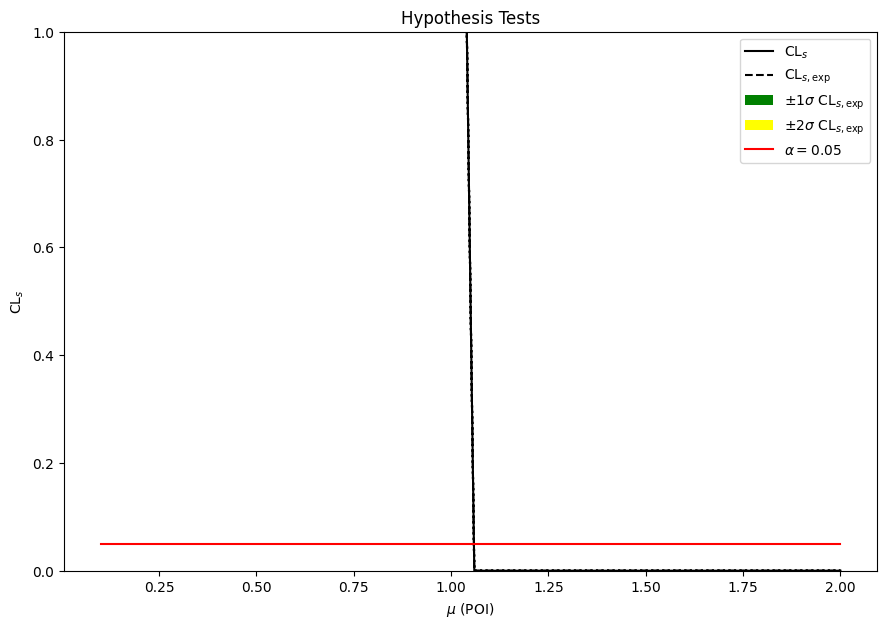

In [7]:
#Grafica de bandera
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7)
ax.set_title("Hypothesis Tests")

artists = brazil.plot_results(poi_values, results1, ax=ax)